In [1]:
import tensorflow as tf
from src.data.data_loader import get_raw_data_as_dataframe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = get_raw_data_as_dataframe()

In [3]:
raw_data.head()

,time,measurement,label,source
0,0.0000,1.610419,0,C:\Users\erik\IES_codebase\EMG_Project\CDT406-...
1,0.0002,1.610419,0,C:\Users\erik\IES_codebase\EMG_Project\CDT406-...
2,0.0004,1.610419,0,C:\Users\erik\IES_codebase\EMG_Project\CDT406-...
3,0.0006,1.610419,0,C:\Users\erik\IES_codebase\EMG_Project\CDT406-...
4,0.0008,1.610419,0,C:\Users\erik\IES_codebase\EMG_Project\CDT406-...


In [4]:
from scipy import signal

def pre_processor_layer(x):
    b = [0.00419699, 0, -0.01678797, 0, 0.02518196, 0, -0.01678797, 0, 0.00419699]
    a = [1,  -6.38164673, 17.89924864,-28.87732286, 29.35610903, -19.27287096, 7.98121461, -1.90559965, 0.20086794]

    # Bandpass 20-500 Hz (also test using signal.lfilter)
    x = signal.filtfilt(b, a, x)

    # Absolute value
    x = tf.abs(x)

    # Moving average 10 samples
    x = tf.signal.frame(x, frame_length=200, frame_step=1)
    x = tf.reduce_mean(x, axis=1)

    x = tf.keras.layers.Normalization(mean=0, variance= 0.004683887229275346)(x)

    return x

In [5]:
from src.utils.path_utils import get_raw_data_dir
import glob

# List all csv files
csv_files = glob.glob(str(get_raw_data_dir()) + "/Dataset_O1/**/*.csv", recursive=True)

In [6]:
# Select a sample signal (replace 'column_name' with your actual column)
single_file = raw_data[raw_data['source'] == csv_files[30]]
sample_signal = single_file['measurement'].values

In [7]:
sample_signal.shape

(170000,)

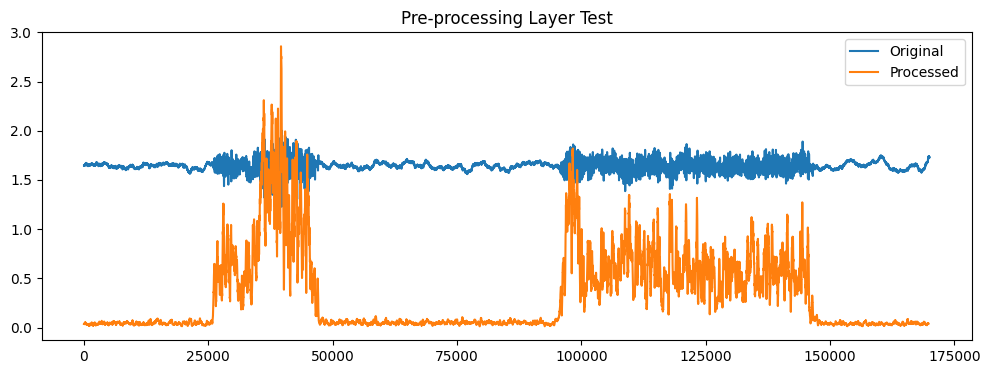

In [8]:
# Apply your pre_processor_layer
processed_signal = pre_processor_layer(sample_signal)

# Plot original vs processed
plt.figure(figsize=(12, 4))
plt.plot(sample_signal, label='Original')
plt.plot(processed_signal, label='Processed')
plt.legend()
plt.title('Pre-processing Layer Test')
plt.show()

In [9]:
from src.models.preprocessing.preprocessor import calibrate_pre_processor

In [10]:
a, b, variance = calibrate_pre_processor(raw_data)

print(f"a: {a}")
print(f"b: {b}")
print(f"variance: {variance}")

a: [  1.          -6.38164673  17.89924864 -28.87732286  29.35610903
 -19.27287096   7.98121461  -1.90559965   0.20086794]
b: [ 0.00419699  0.         -0.01678797  0.          0.02518196  0.
 -0.01678797  0.          0.00419699]
variance: 0.004675060976296663
